# <font color=#023F7C> **Machine Learning and Deep Learning**

---



<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Name**: Nammous, Uthayakumar, Malapert, Contri, KUETE TSAYO             <br>
**School**: HEC, IPP         <br>
**Group number**: 25    <br>
**Track**: Intermediate           <br>
**Teaching Assistants**: Thibault Porssut and Farouk Kadri, Machine Learning Research Engineer @ Hi! PARIS

# **1. Important guidelines**


The RUL (Remaining Useful Life) refers to the remaining lifespan of an aircraft engine before failure. In the context of the NASA C-MAPSS dataset, this term represents the number of operational cycles an engine can still perform before breaking down. **The goal of this practical session** is to build a Machine Learning model that can p**redict this value using sensor data collected during previous cycles.**

To achieve this goal, you are provided with three datasets: train_FD001.txt, test_FD001.txt, and RUL_FD001.txt, originating from the NASA C-MAPSS dataset. <br>
These datasets contain sensor measurements and operational settings for multiple aircraft engines recorded over a series of operational cycles. Each engine is run until it fails, and the sensor data capture the degradation process over time. <br>
The file RUL_FD001.txt contains the actual Remaining Useful Life (RUL) values for the engines in the test set at the point where the test data end.

The variable to predict is RUL, which represents the number of operational cycles remaining before the engine fails.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in two parts: Machine Learning and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning and Deeep Learning section.
- **Intermediate track**: Please complete Machine Learning, Deep Learning and the optional section.

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Machine Learning and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2025.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries needed for this notebook.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Now load the train and test datasets using `pd.read_csv()`

In [35]:
train_path =  '02_df_train_FD001_wo_nan_denoised.csv'
test_path = '02_df_test_FD001_wo_nan_denoised.csv'

# Train and test data.
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (18816, 28)
Test shape: (12039, 28)


In [36]:
train_df.head()

,engine_unit_number,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (°C),LPC outlet temperature (°C),HPC outlet temperature (°C),LPT outlet temperature (°C),Fan inlet pressure (bar),...,Corrected core speed (rpm),Bypass ratio (dimensionless),"Burner fuel-air ratio (mass ratio, dimensionless)",Bleed enthalpy (kJ/kg),Demanded fan speed (rpm),Demanded corrected fan speed (rpm),HPT coolant bleed flow (kg/s),LPT coolant bleed flow (kg/s),RUL,RUL_class
0,1,1,-0.0007,-0.0004,100.0,15.0,83.416667,610.016667,504.961111,1.008014,...,8138.62,8.4195,0.03,392.0,2388,100.0,17.717318,10.622680,191,0
1,1,2,0.0019,-0.0003,100.0,15.0,83.600000,611.194444,506.372222,1.008014,...,8131.49,8.4318,0.03,392.0,2388,100.0,17.690102,10.624766,190,0
2,1,3,-0.0043,0.0003,100.0,15.0,83.711111,609.066667,506.961111,1.008014,...,8133.23,8.4178,0.03,390.0,2388,100.0,17.667423,10.588751,189,0
3,1,4,0.0007,0.0000,100.0,15.0,83.711111,606.177778,505.666667,1.008014,...,8133.83,8.3682,0.03,392.0,2388,100.0,17.635671,10.602223,188,0
4,1,5,-0.0019,-0.0002,100.0,15.0,83.722222,610.467202,508.083333,1.008014,...,8133.80,8.4294,0.03,393.0,2388,100.0,17.644743,10.616057,187,0


In [37]:
train_df.RUL_class.value_counts(normalize=True)*100

RUL_class
0    80.266794
1    19.733206
Name: proportion, dtype: float64

/tmp/ipykernel_9928/3140588429.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


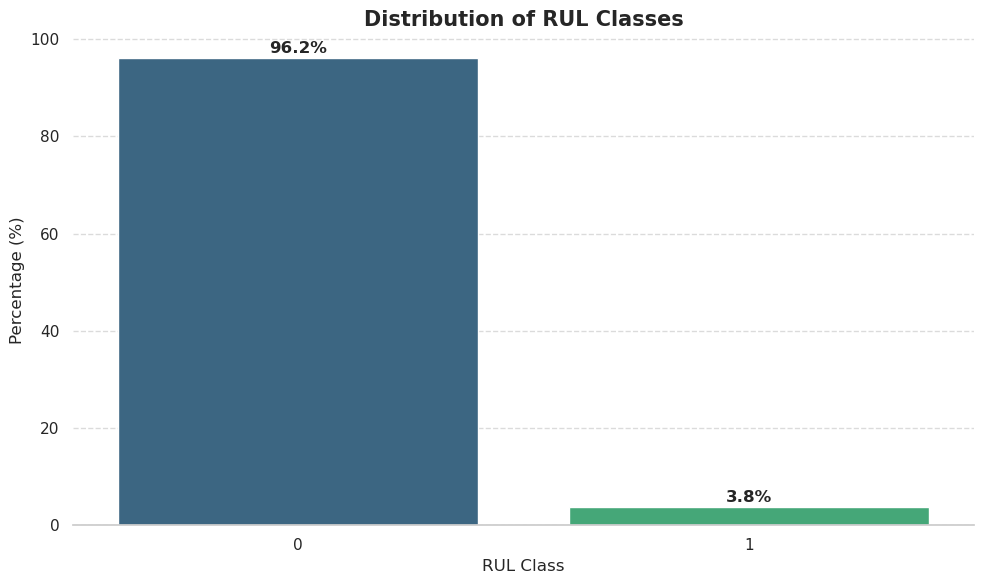

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the normalized value counts as percentages
class_distribution = test_df.RUL_class.value_counts(normalize=True) * 100

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a bar plot with custom styling
ax = sns.barplot(
    x=class_distribution.index,
    y=class_distribution.values,
    palette='viridis'
)

# Add value labels on top of each bar
for i, value in enumerate(class_distribution.values):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontweight='bold')

# Add titles and labels
plt.title('Distribution of RUL Classes', fontsize=15, fontweight='bold')
plt.xlabel('RUL Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve aesthetics
sns.despine(left=True)
plt.tight_layout()

# Show the plot
plt.show()

**This barplot shows that the dataset is imbalanced**

### **2.1 Data preprocessing**

In [38]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [39]:
def replace_with_gaussian_bins(df, cols):
    """
    when it is temperature it changes by categorical indicators (extremely low -> extremely high)
    Replace numerical columns with 7-category Gaussian bins based on mean ± n*std.

    Parameters:
    df   : DataFrame
    cols : list of column names to transform

    Returns:
    DataFrame with the same structure but selected numeric columns replaced with categorical bins
    """
    df_out = df.copy()

    labels = [
        "Extremely Low",
        "Very Low",
        "Low",
        "Normal",
        "High",
        "Very High",
        "Extremely High"
    ]

    for col in cols:
        mu = df_out[col].mean()
        sigma = df_out[col].std()

        bins = [
          -np.inf,
          mu - 2*sigma,   # Extremely Low
          mu - 1*sigma,   # Very Low
          mu - 0.5*sigma,   # Low
          mu + 0.5*sigma,   # High
          mu + 1*sigma,   # Very High
          mu + 2*sigma,   # Extremely High
          np.inf
      ]

        df_out[col] = pd.cut(df_out[col], bins=bins, labels=labels, include_lowest=True)

    return df_out

In [40]:
train_df=replace_with_gaussian_bins(train_df,["HPC outlet temperature (°C)"])
test_df=replace_with_gaussian_bins(test_df,["HPC outlet temperature (°C)"])


In [41]:


features = ['engine_unit_number',
  'time_cycles',
  'LPC outlet temperature (°C)',
  "HPC outlet temperature (°C)",
  "LPT outlet temperature (°C)",
  "HPC outlet pressure (bar)",
  "Physical core speed (rpm)",
  "Fuel flow / Ps30 (kg/s/bar)",
  "Corrected fan speed (rpm)",
  "Bypass ratio (dimensionless)",
  "Bleed enthalpy (kJ/kg)",
  "HPT coolant bleed flow (kg/s)"]



X_train = train_df[features].copy()
y_train = train_df["RUL_class"].copy()

X_test = test_df[features].copy()
y_test = test_df["RUL_class"].copy()


print("Train rows:", X_train.shape[0], "Test engines:", X_test.shape[0])

Train rows: 18816 Test engines: 12039


In [42]:
y_train.unique()

array([0, 1])

it is only 0s and 1s, so it is classification

**<u>Question 2.1.1:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>


The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [43]:
X_train.dtypes

engine_unit_number                  int64
time_cycles                         int64
LPC outlet temperature (°C)       float64
HPC outlet temperature (°C)      category
LPT outlet temperature (°C)       float64
HPC outlet pressure (bar)         float64
Physical core speed (rpm)         float64
Fuel flow / Ps30 (kg/s/bar)       float64
Corrected fan speed (rpm)         float64
Bypass ratio (dimensionless)      float64
Bleed enthalpy (kJ/kg)            float64
HPT coolant bleed flow (kg/s)     float64
dtype: object

In [44]:
for e in X_train.columns : 
    print(e, X_train[e].nunique())

engine_unit_number 100
time_cycles 351
LPC outlet temperature (°C) 288
HPC outlet temperature (°C) 7
LPT outlet temperature (°C) 3693
HPC outlet pressure (bar) 472
Physical core speed (rpm) 5410
Fuel flow / Ps30 (kg/s/bar) 386
Corrected fan speed (rpm) 41
Bypass ratio (dimensionless) 1764
Bleed enthalpy (kJ/kg) 10
HPT coolant bleed flow (kg/s) 99


In [45]:
categorical_var = list(X_train.select_dtypes(include="object").columns)

In [46]:
categorical_var = ["HPC outlet temperature (°C)"]  

onehot_encoder = OneHotEncoder(sparse_output=False)
X_train_cat = onehot_encoder.fit_transform(X_train[categorical_var])
X_test_cat = onehot_encoder.transform(X_test[categorical_var])

feature_names = onehot_encoder.get_feature_names_out(categorical_var)

print(feature_names)

X_train_cat = pd.DataFrame(X_train_cat, columns=feature_names, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=feature_names, index=X_test.index)

X_train_cat.shape, X_test_cat.shape
X_train_cat


['HPC outlet temperature (°C)_Extremely High'
 'HPC outlet temperature (°C)_Extremely Low'
 'HPC outlet temperature (°C)_High' 'HPC outlet temperature (°C)_Low'
 'HPC outlet temperature (°C)_Normal'
 'HPC outlet temperature (°C)_Very High'
 'HPC outlet temperature (°C)_Very Low']


,HPC outlet temperature (°C)_Extremely High,HPC outlet temperature (°C)_Extremely Low,HPC outlet temperature (°C)_High,HPC outlet temperature (°C)_Low,HPC outlet temperature (°C)_Normal,HPC outlet temperature (°C)_Very High,HPC outlet temperature (°C)_Very Low
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
18811,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18812,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18813,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18814,0.0,0.0,0.0,0.0,0.0,1.0,0.0


However label encoding is preferred over one-hot encoding for ordinal labels because ordinal features have a meaningful, intrinsic order (e.g., Low < Medium < High). Label encoding preserves this natural ranking by mapping categories to integers that reflect their order, allowing models to interpret the progression between categories. In contrast, one-hot encoding would treat each category as unrelated, discarding the ordinal relationship and increasing the number of features unnecessarily, which can reduce efficiency without adding value.

**<u>Question 2.1.2:</u>** <br>**Transform the categorical variables with `LabelEncoder`.** <br>


The column names LabelEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for more info on how to use scikit-learn's `LabelEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*

In [77]:
from sklearn.preprocessing import OrdinalEncoder
categorical_var = 'HPC outlet temperature (°C)'
ordinal_encoder = OrdinalEncoder()
X_train_cat = ordinal_encoder.fit_transform(X_train[[categorical_var]])
X_test_cat = ordinal_encoder.transform(X_test[[categorical_var]])

print("encoded categories :", ordinal_encoder.categories_)

X_train_cat


encoded categories : [array(['Extremely High', 'Extremely Low', 'High', 'Low', 'Normal',
       'Very High', 'Very Low'], dtype=object)]


array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [5.],
       [5.]])

**<u>Question 2.1.3</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization).**<br>





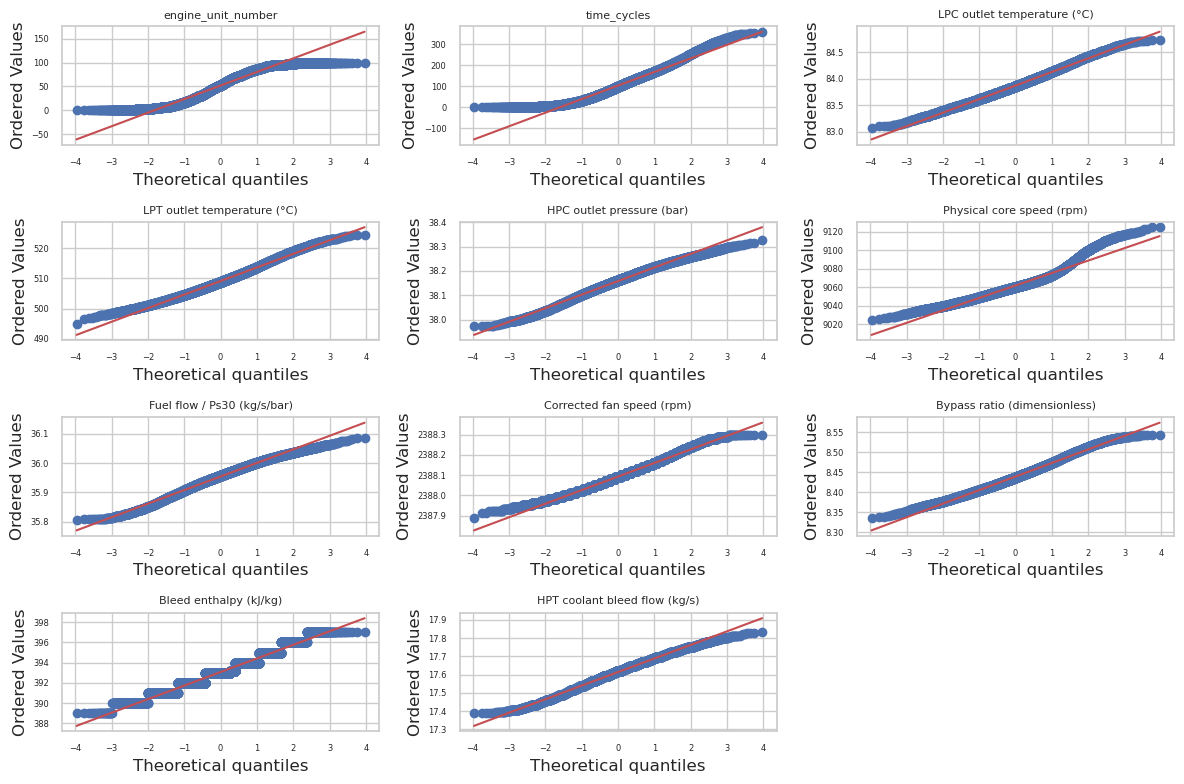

In [78]:
# Import necessary libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

# Get list of continuous variables
continuous_var = list(X_train.select_dtypes(include=[int, float]).columns)

# Calculate grid dimensions for subplots
n_vars = len(continuous_var)
n_cols = 3  # You can adjust this number to control how many plots per row
n_rows = math.ceil(n_vars / n_cols)

# Create a figure with smaller subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 2*n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Create Q-Q plots for each continuous variable
for i, var in enumerate(continuous_var):
    if i < n_vars:  # Check if we haven't exceeded the number of variables
        # Create Q-Q plot
        stats.probplot(X_train[var].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f'{var}', fontsize=8)  # Smaller title
        axes[i].tick_params(axis='both', which='major', labelsize=6)  # Smaller tick labels
    
# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

**The QQ-plots shows that the variables are normally distributed so we can apply standardization to the continuous variables**

In [79]:
continuous_var = list(X_train.select_dtypes(include=[int, float]).columns)

std_scaler = StandardScaler()

X_train_cont = std_scaler.fit_transform(X_train[continuous_var])
X_test_cont = std_scaler.transform(X_test[continuous_var])

X_train_cont = pd.DataFrame(X_train_cont, columns=continuous_var, index=X_train.index)
X_test_cont = pd.DataFrame(X_test_cont, columns=continuous_var, index=X_test.index)

#X_train_cont

In [80]:
X_train_cat = pd.DataFrame(X_train_cat, columns=['HPC outlet temperature (°C)'])

X_train_scaled = pd.concat([X_train_cont, X_train_cat], axis=1)

X_train_scaled.columns = X_train_scaled.columns.astype(str)  


In [81]:
X_test_cat = pd.DataFrame(X_test_cat, columns=['HPC outlet temperature (°C)'])

X_test_scaled = pd.concat([X_test_cont, X_test_cat], axis=1)

X_test_scaled.columns = X_test_scaled.columns.astype(str)

In [82]:
X_train_scaled.describe()

,engine_unit_number,time_cycles,LPC outlet temperature (°C),LPT outlet temperature (°C),HPC outlet pressure (bar),Physical core speed (rpm),Fuel flow / Ps30 (kg/s/bar),Corrected fan speed (rpm),Bypass ratio (dimensionless),Bleed enthalpy (kJ/kg),HPT coolant bleed flow (kg/s),HPC outlet temperature (°C)
count,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,1.881600e+04,18816.000000
mean,-9.667248e-17,9.365147e-17,3.193213e-15,-1.472745e-14,5.211251e-14,-6.304179e-14,-1.463470e-13,-5.089441e-12,-2.326182e-14,5.468037e-16,4.199211e-16,3.814785
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.401634
min,-1.746299e+00,-1.557798e+00,-3.097853e+00,-3.175798e+00,-3.310719e+00,-2.729847e+00,-3.153298e+00,-3.006894e+00,-3.022186e+00,-2.966161e+00,-2.996713e+00,0.000000
25%,-8.896307e-01,-8.103751e-01,-7.098882e-01,-7.201723e-01,-6.402794e-01,-6.452528e-01,-6.415311e-01,-7.810022e-01,-7.197406e-01,-7.822070e-01,-6.248075e-01,3.000000
50%,3.557066e-02,-7.820593e-02,-3.691622e-02,-7.214296e-02,6.117246e-02,-1.154426e-01,6.767366e-02,-3.903828e-02,-6.189911e-02,-5.422224e-02,4.419137e-02,4.000000
75%,8.922386e-01,6.692168e-01,6.577646e-01,6.398285e-01,7.257058e-01,4.410747e-01,7.177780e-01,7.029256e-01,6.517414e-01,6.737625e-01,7.131903e-01,5.000000
max,1.646106e+00,3.857203e+00,3.349653e+00,3.361060e+00,2.977736e+00,4.545300e+00,2.815842e+00,3.077210e+00,3.065785e+00,2.857717e+00,2.963459e+00,6.000000


The dataframe is almost normalized, the mean is almost equal to 0 and the standard deviation is equal to 1

In [83]:
X_test_scaled.describe()

,engine_unit_number,time_cycles,LPC outlet temperature (°C),LPT outlet temperature (°C),HPC outlet pressure (bar),Physical core speed (rpm),Fuel flow / Ps30 (kg/s/bar),Corrected fan speed (rpm),Bypass ratio (dimensionless),Bleed enthalpy (kJ/kg),HPT coolant bleed flow (kg/s),HPC outlet temperature (°C)
count,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000,12039.000000
mean,-0.016201,-0.451600,-0.384794,-0.447884,0.422346,-0.307148,0.435764,-0.337697,-0.412120,-0.395932,0.397198,3.816596
std,0.974412,0.763507,0.821077,0.762628,0.778708,0.670206,0.760623,0.796430,0.793728,0.840809,0.801573,1.406706
min,-1.746299,-1.557798,-2.859057,-2.811819,-2.055489,-2.680763,-1.882639,-2.710108,-2.766685,-2.238177,-2.023623,0.000000
25%,-0.821097,-1.084939,-0.970394,-0.994386,-0.111114,-0.782397,-0.094852,-0.929395,-0.969368,-0.782207,-0.138263,3.000000
50%,0.001304,-0.566319,-0.405965,-0.460715,0.442664,-0.342813,0.466601,-0.335824,-0.417251,-0.054222,0.409100,4.000000
75%,0.823705,0.074329,0.180172,0.071727,0.984135,0.132500,0.983730,0.257747,0.123119,-0.054222,0.956463,5.000000
max,1.646106,2.957246,2.242505,2.009667,2.719306,2.143830,2.741966,2.038461,2.011476,2.129732,2.781005,6.000000


### **2.2 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it to train Machine Learning models.





In [84]:
# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    classification_report, roc_auc_score, PrecisionRecallDisplay, average_precision_score
)

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting & Style
import seaborn as sns
sns.set(style="whitegrid")


**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).

advice: Try Random Forest



**Why classification instead of regression?**

Although the Remaining Useful Life (RUL) is a continuous variable, here we approach the problem as classification because:

- Classification simplifies decision-making by focusing on whether an engine is likely to fail soon (within 30 cycles) rather than predicting the exact remaining cycles.
- Regression models on RUL often struggle to be robust due to noise and variability in the sensor data.
- Classification allows for more stable, actionable predictions aligned with maintenance needs: "replace soon" vs "safe".

<u>**Question 2.2.1**:</u> <br>  Choose any three models to try. Which ones do you pick ?

**We chose KNN, Decision Tree and Gradient Boosting. We tested Random Forest but the test recall result was less than for the other classifier**

<u>**Question 2.2.2**:</u> <br> Train the FIRST selected model using .fit(X_train_scaled, y_train).

In [85]:
# 1. K Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

<u>**Question 2.2.3**:</u> <br> Train the SECOND and THIRD selected models.

In [86]:

# 2. Decision Tree
tree = DecisionTreeClassifier() # define the model
tree.fit(X_train_scaled, y_train) # fit means train

# 3. boosting

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
boost.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

<u>**Question 2.2.4**:</u> <br> FIRST model: predict on TRAIN/TEST, then print Test Accuracy, Test Recall, Test F1.
If our goal is to catch failures, which metric should we prioritize?

*Help: The .predict() function should be used on the feature of the test set (X_test)*. [page](https://scikit-learn.org/stable/getting_started.html)

accuracy_score(), recall_score(), f1_score()
find all metrics here: [page](https://scikit-learn.org/stable/api/sklearn.metrics.html)





In [88]:
# 2. K Nearest Neighbors
knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)

knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
knn_test_recall = recall_score(y_test, knn_test_pred, average='binary')  # ou 'macro' selon ton problème
knn_test_f1 = f1_score(y_test, knn_test_pred, average='binary')

print("KNN - Test Accuracy:", knn_test_accuracy)
print("KNN - Test Recall:", knn_test_recall)
print("KNN - Test F1-score:", knn_test_f1)



KNN - Test Accuracy: 0.9661101420383753
KNN - Test Recall: 0.420824295010846
KNN - Test F1-score: 0.48743718592964824


**We should prioritize recall test. Accuracy can show high values even when the model performs poorly on the minority class because it calculates the proportion of predicted positives that were actually correct, and therefore can miss the minority class. The recall test measures how well the model identifies true positives**

<u>**Question 2.2.5**:</u> <br> Repeat for the SECOND model.

In [92]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)  # Création du modèle Decision Tree
dt_model.fit(X_train_scaled, y_train)  # Entraînement du modèle

dt_train_pred = dt_model.predict(X_train_scaled)
dt_test_pred = dt_model.predict(X_test_scaled)

dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_test_recall = recall_score(y_test, dt_test_pred, average='binary')  # ou 'macro' selon ton problème
dt_test_f1 = f1_score(y_test, dt_test_pred, average='binary')

print("Decision Tree - Test Accuracy:", dt_test_accuracy)
print("Decision Tree - Test Recall:", dt_test_recall)
print("Decision Tree - Test F1-score:", dt_test_f1)

Decision Tree - Test Accuracy: 0.9460088047179999
Decision Tree - Test Recall: 0.38177874186550975
Decision Tree - Test F1-score: 0.35129740518962077


<u>**Question 2.2.6**:</u> <br> Repeat for the THIRD model.

In [152]:
# 3. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)  # Création du modèle Gradient Boosting
gb_model.fit(X_train_scaled, y_train)  # Entraînement du modèle

gb_train_pred = gb_model.predict(X_train_scaled)
gb_test_pred = gb_model.predict(X_test_scaled)

gb_test_accuracy = accuracy_score(y_test, gb_test_pred)
gb_test_recall = recall_score(y_test, gb_test_pred, average='binary')  # ou 'macro'
gb_test_f1 = f1_score(y_test, gb_test_pred, average='binary')

print("Gradient Boosting - Test Accuracy:", gb_test_accuracy)
print("Gradient Boosting - Test Recall:", gb_test_recall)
print("Gradient Boosting - Test F1-score:", gb_test_f1)

Gradient Boosting - Test Accuracy: 0.9694326771326522
Gradient Boosting - Test Recall: 0.4490238611713666
Gradient Boosting - Test F1-score: 0.5294117647058824


You may notice that we emphasize Recall. Recall answers: “of all the true failures, how many did the model catch?” On imbalanced datasets, a model can show high accuracy while still missing many failures (predicting the majority class most of the time). That means lots of false negatives. When the goal is failure detection, Recall is the right metric because it prioritizes catching positives (fewer missed failures), even if that sometimes increases false alarms. Keep in mind there’s a trade-off: higher Recall can lower Precision, so we pick the threshold (or settings) that gives the best compromise for our use case.

- If Accuracy is high but Recall is low, we are missing failures (false negatives).
- Since the goal is to detect failures, prioritize Recall.

<u>**Question 2.2.7**:</u> <br> Find the best model by TEST Recall among the three and show its TEST confusion matrix.

*help: Look at recall_score() and confusion_matrix() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)*

The best model by test recall is Grzadient boost model.

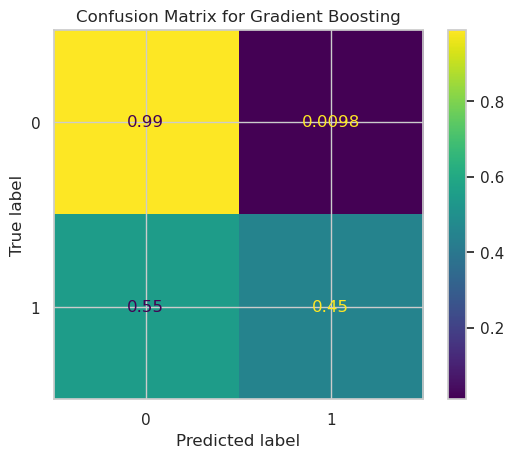

In [95]:
best_pred = gb_test_pred
best_model_name = "Gradient Boosting"  

classes = np.unique(y_test)

confusion_mat = confusion_matrix(y_true=y_test, y_pred=best_pred, labels=classes, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classes)
disp.plot()

plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

- Only about 1% of class 0 instances are misclassified as 1 : very few false positives.
- 55% of class 1 (minority class) instances are wrongly classified as 0 : many false negatives.

<u>**Question 2.2.8**:</u> <br> Plot ROC and Precision–Recall curves for the BEST model (needs probabilities).
*help: Look at roc_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and precision_recall_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)*


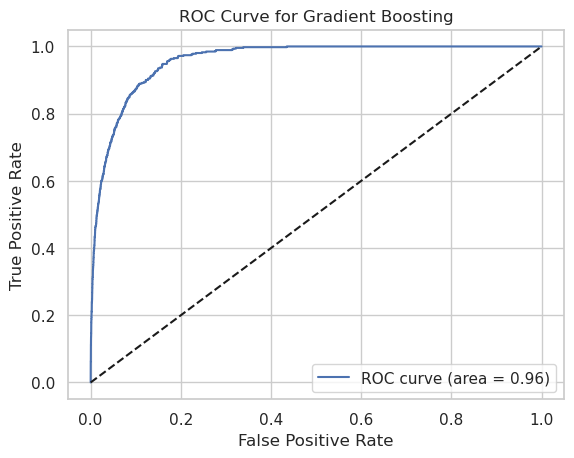

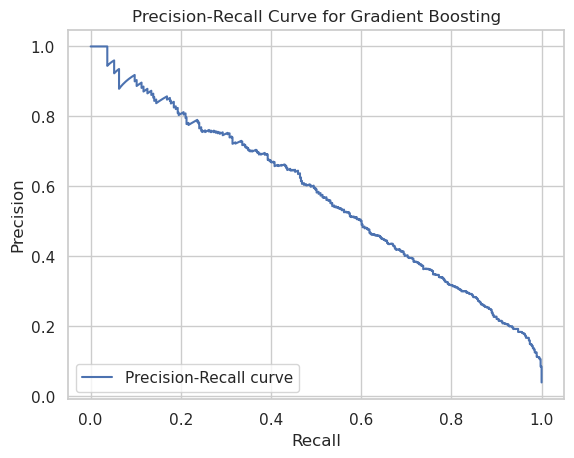

In [97]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, PrecisionRecallDisplay

# Get predicted probabilities for the positive class
best_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, best_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc="lower left")
plt.show()

- The ROC curve rises quickly towards the top-left corner, which is good.
- The precision recall curve is linear which is bad for the model.

<u>**Question 2.2.9**:</u> <br> Pick the threshold with the highest Recall. ONLY on the best model (picked above)

**The best treshold is a tradeoff between decision and recall. We keep the same treshold (=0.5) whch is the closest point of the curve to the top right corner of the graoh. 
Rq : this precision recall curve means that the recall is weak, indeed theres a probability of 1/2 that the minority class is not well classified.**

<u>**Question 2.2.10**:</u> <br> Tiny GridSearch to favor Recall.

*Help: Try GridSearchCV [page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on the best model you selected (by Recall) to find hyperparameters that improve Recall.<br>
Report the best hyperparameters (.best_params_) and the best cross-validated Recall (.best_score_). Then re-fit the tuned model and print the Test Recall.*

Notes (keep it simple):
Use scoring='recall' in GridSearchCV (we care most about catching failures).
Keep the grid tiny (2–3 values per parameter) to avoid long runs; set cv=3.
Compare against your baseline Test Recall (before tuning). One line is enough.

*(Optional) If you tried different decision thresholds earlier (e.g., 0.4 / 0.5 / 0.6), also report Test Recall using your chosen threshold with the tuned model.*

In [131]:
# Tiny GridSearch to favor Recall on the best model (Gradient Boosting)

# Define a tiny parameter grid
param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), # model to use
                           param_grid=param_grid, # grid of hyperparameter to test
                           cv=3, # number of splits for K-Fold cross validation
                           scoring="recall", # which metric to use with gridsearch
                           n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
print("Starting GridSearch...")
grid_search.fit(X_train_scaled, y_train)
print("GridSearch finished.")

# Report the best hyperparameters and best cross-validated Recall
print("\nBest hyperparameters found:", grid_search.best_params_)
print("Best cross-validated Recall:", grid_search.best_score_)

# Get the best model from the grid search
tuned_boosting_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned_boosting = tuned_boosting_model.predict(X_test_scaled)
test_recall_tuned = recall_score(y_test, y_pred_tuned_boosting)

print("\nTest Recall of the tuned Gradient Boosting model:", test_recall_tuned)

# Compare with baseline Test Recall
print(f"Baseline Test Recall (before tuning): {recall_score(y_test, gb_test_pred):.4f}")
print(f"Tuned Model Test Recall: {test_recall_tuned:.4f}")

Starting GridSearch...
GridSearch finished.

Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated Recall: 0.7640825925108473

Test Recall of the tuned Gradient Boosting model: 0.4121475054229935
Baseline Test Recall (before tuning): 0.4490
Tuned Model Test Recall: 0.4121


**The result for gridsearch are less than the result for the previous gradient boosting model. It may be due to ioverfitting caused by class imbalance.** Consequently, we keep the forst gradient boosting model.

## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [106]:
import shap
np.bool=bool # code from last year

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, you can work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

In [107]:
df_shap = X_train_scaled.iloc[:100]

<u>**Question 3.1**:</u> <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [149]:

# Récupérer le meilleur modèle GradientBoosting
best_gb = results["GradientBoosting"]["best_model"]



best_gb = gb_model
# Créer l'explainer SHAP
explainer = shap.TreeExplainer(best_gb)


**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [156]:

# Calculer les valeurs SHAP sur le jeu de test
shap_values = explainer.shap_values(X_train_scaled)


<u>**Question 3.2**:</u> <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[0]` in your plot and not every shap value computed*

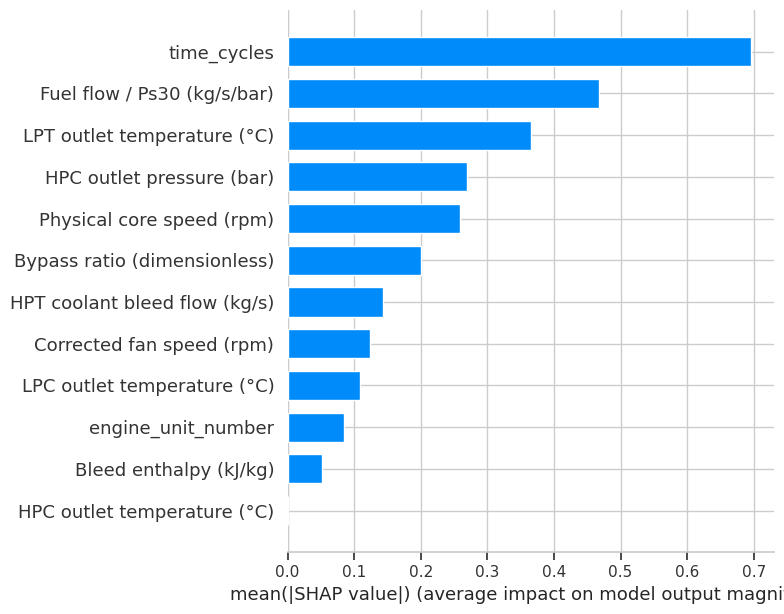

In [157]:
# bar plot pour voir l'importance moyenne des features
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")


<u>**Question 3.4**:</u> <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

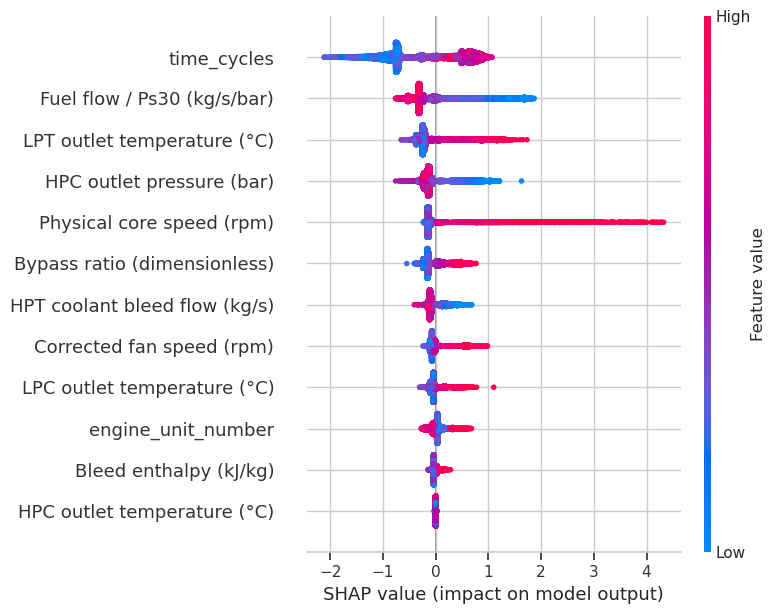

In [158]:
shap.summary_plot(shap_values, X_train_scaled, plot_type="dot")


- **Which variables are important in terms of explainability ?**\

  
-> The most important variable to predict RUL_class is time_cycles, followed by  Fuel Flow / Ps30 and LPT outlet temperature, in fact, the variables are ordered by how much they influenced the prediction.


- **How does the values of the important variables affect predictions ?**\

-> High values of time_cycles (red) leads to higher the probability that RUL_class = 1, meaning that as the time goes, the remaining life of the engines is decreasing


-> High values of fuel flow decrease the probability that RUL_class = 1, which means that the higher the fuel flow is, the lower the remaining useful life is.

-> High values of LPT outlet temperature tends to decrease theRUL clas, meaning that the higher the LPT outlet temperature is, the higher the remaining useful life is.

## **4. Deep Learning**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [161]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

<u>**Question 4.1**:</u> <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

In [166]:

# Assume X_train_scaled, X_test_scaled, y_train, y_test exist

# --- Define a small neural network ---
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # optional, prevents overfitting
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

# --- Compile the model ---
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# --- Train the model ---
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# --- Evaluate on test set ---
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.3f}")


Epoch 1/10


/home/raphael/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8994 - loss: 0.2403 - val_accuracy: 0.9137 - val_loss: 0.1987
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9160 - loss: 0.1907 - val_accuracy: 0.9214 - val_loss: 0.1865
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9240 - loss: 0.1777 - val_accuracy: 0.9195 - val_loss: 0.1865
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9225 - loss: 0.1742 - val_accuracy: 0.9190 - val_loss: 0.1884
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9261 - loss: 0.1706 - val_accuracy: 0.9171 - val_loss: 0.1892
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9274 - loss: 0.1661 - val_accuracy: 0.9182 - val_loss: 0.1849
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9293 - loss: 0.1646 - val_accuracy: 0.9216 - val_loss: 0.1810
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9300 - loss: 0.1619 - val_accuracy: 0.9238 - val_

In [167]:
from sklearn.metrics import classification_report
import numpy as np

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print a full classification report
print("Classification Report (Precision, Recall, F1-score):")
print(classification_report(y_test, y_pred, digits=4))


377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Classification Report (Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0     0.9732    0.9969    0.9849     11578
           1     0.7989    0.3102    0.4469       461

    accuracy                         0.9706     12039
   macro avg     0.8860    0.6535    0.7159     12039
weighted avg     0.9665    0.9706    0.9643     12039



The result is not convincing, with a recall of 0.37 for the minority class (It correctly identifies only 39.1% of actual class 1 instances). The model is still excellent at predicting the majority class but struggles with the minority class.